In [ ]:
# Load the dataset from a zip file
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/museum_train.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Import necessary libraries
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

### Dataset Loading and Preprocessing
- **Dataset Paths**: 
  - Indoor images: `museum_train/indoor/`
  - Outdoor images: `museum_train/outdoor/`
- **Preprocessing Steps**:
  - Resize images to `64x64` pixels.
  - Convert images to grayscale.
  - Flatten images into 1D arrays.
  - Normalize pixel values to the range `[0, 1]`.
- **Labels**:
  - Indoor: `0`
  - Outdoor: `1`

In [ ]:
# Define paths for indoor and outdoor training images
indoor_train_path = '/content/museum_train/indoor'
outdoor_train_path = '/content/museum_train/outdoor'

In [ ]:
# Function to load images from a folder and preprocess them
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
         # Open and resize the image
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((64, 64)) # Resize images to a common size
        img = img.convert('L') # Convert to grayscale
        img = np.array(img).flatten() # Flatten the image to 1D array
        img = img/255 # Normalize pixel values to [0, 1]
        images.append(img)
        labels.append(label)
    return images, labels

In [ ]:
# Load indoor and outdoor images
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [ ]:
# Combine indoor and outdoor images into a single dataset
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training and Evaluation
- **Model 1**: Decision Tree with default hyperparameters.
  - Criterion: `gini`
  - Max Depth: `10`
  - Splitter: `random`
  - Min Samples Leaf: `20`
- **Model 2**: Decision Tree with increased depth and adjusted hyperparameters.
  - Criterion: `entropy`
  - Max Depth: `15`
  - Splitter: `best`
  - Min Samples Leaf: `20`
  - Class Weight: `balanced`
- **Model 3**: Decision Tree with entropy criterion and adjusted hyperparameters.
  - Criterion: `gini`
  - Max Depth: `15`
  - Splitter: `best`
  - Min Samples Leaf: `20`
  - Class Weight: `balanced`
- **Evaluation Metrics**:
  - Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

### Train Model 1: Decision Tree with default hyperparameters

In [ ]:
# Train Model 1: Decision Tree with default hyperparameters
model_1 = DecisionTreeClassifier(
    criterion='gini',
    splitter='random',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=20,
    max_features='sqrt',
    random_state=42
)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=20,
                       random_state=42, splitter='random')

### Evaluation Metrics for Model 1


Accuracy: 70.35%
Precision: 70.01%
Recall: 69.94%
F1 Score: 69.97%


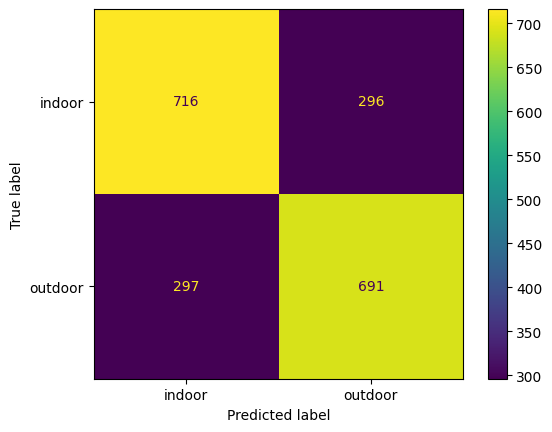

In [ ]:
# Evaluate Model 1
y_pred = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

### Testing on a Single Image
- A single image is loaded, preprocessed, and passed through the trained model for prediction.
- The image is resized, converted to grayscale, flattened, and normalized before prediction.

In [15]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((64, 64))
    img = img.convert('L')
    img = np.array(img).flatten()
    img = img/255
    return img

In [16]:
my_img = load_single_images('/content/test_image_2.jpg')

In [ ]:
# Test Model 1 on a single image
model_1.predict(my_img.reshape(1,-1))

array([1])

### Training Model 2: Decision Tree with entropy criterion and increased depth

In [ ]:
# Train Model 2: Decision Tree with entropy criterion and increased depth
model_2 = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=20,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='sqrt', min_samples_leaf=20,
                       random_state=42)

### Evaluation Metrics for Model 2

Accuracy: 68.00%
Precision: 67.72%
Recall: 67.31%
F1 Score: 67.51%


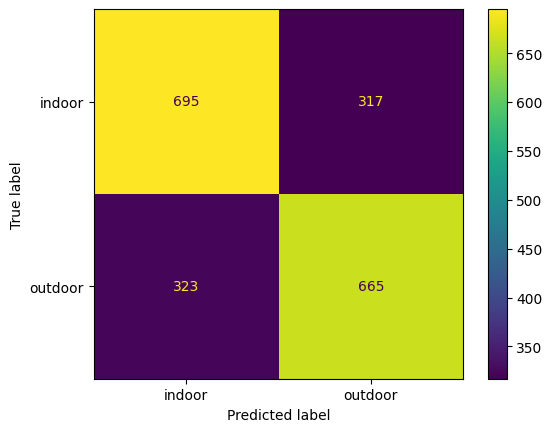

In [ ]:
# Evaluate Model 2
y_pred = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

### Testing model on test image

In [34]:
model_2.predict(my_img.reshape(1,-1))

array([0])

In [31]:
model_3 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    splitter='best',
    min_samples_split=2,
    min_samples_leaf=20,
    class_weight='balanced',
    max_features='sqrt',
    random_state=42
)
model_3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       max_features='sqrt', min_samples_leaf=20,
                       random_state=42)

Accuracy: 68.35%
Precision: 67.84%
Recall: 68.32%
F1 Score: 68.08%


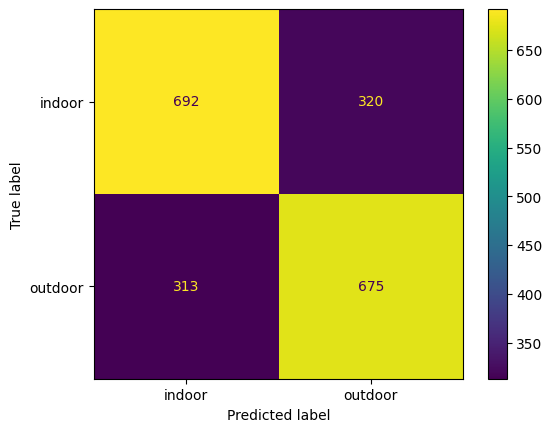

In [33]:
y_pred = model_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [35]:
model_3.predict(my_img.reshape(1,-1))

array([1])